In [1]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install yfinance pandas numpy statsmodels scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


[*********************100%%**********************]  2 of 2 completed
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14440\680980566.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  spread = (data[ticker1] - result.params[1] * data[ticker2]) - result.params[0]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14440\680980566.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  positions[f'{ticker2}_position'] = positions[f'{ticker1}_{ticker2}_position'] * result.params[1] * -1


Cointegration test result for CC3.SI and Z74.SI: 0.9268733104846708


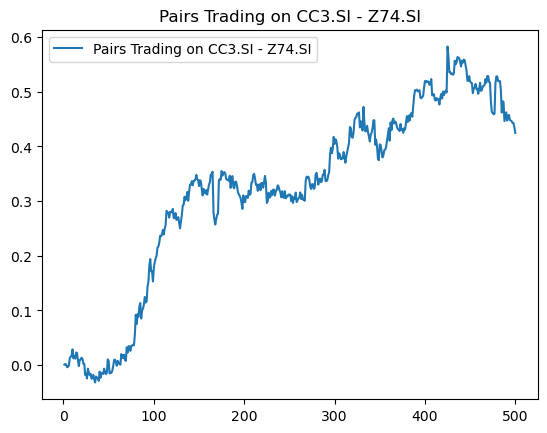

[*********************100%%**********************]  2 of 2 completed

Cointegration test result for BTC-USD and ETH-USD: 0.02413351717468897



C:\Users\ASUS\AppData\Local\Temp\ipykernel_14440\680980566.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  spread = (data[ticker1] - result.params[1] * data[ticker2]) - result.params[0]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14440\680980566.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  positions[f'{ticker2}_position'] = positions[f'{ticker1}_{ticker2}_position'] * result.params[1] * -1


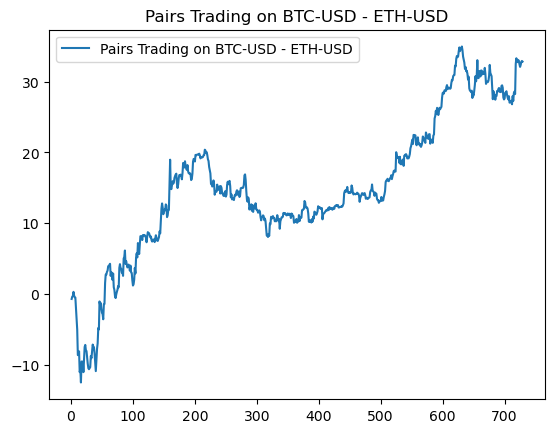

[*********************100%%**********************]  2 of 2 completed

Cointegration test result for GBPUSD=X and EURUSD=X: 0.10467721800898405



C:\Users\ASUS\AppData\Local\Temp\ipykernel_14440\680980566.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  spread = (data[ticker1] - result.params[1] * data[ticker2]) - result.params[0]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14440\680980566.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  positions[f'{ticker2}_position'] = positions[f'{ticker1}_{ticker2}_position'] * result.params[1] * -1


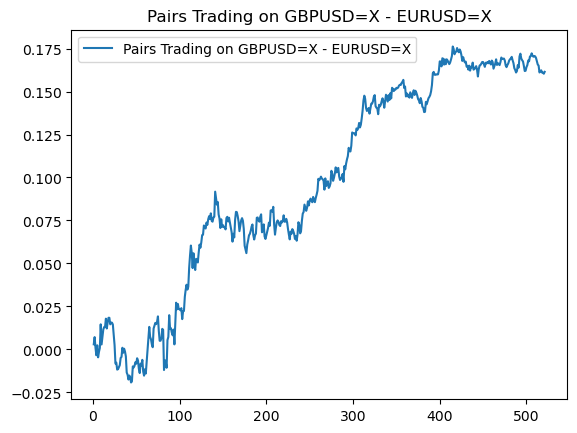

[*********************100%%**********************]  2 of 2 completed
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14440\680980566.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  spread = (data[ticker1] - result.params[1] * data[ticker2]) - result.params[0]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14440\680980566.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  positions[f'{ticker2}_position'] = positions[f'{ticker1}_{ticker2}_position'] * result.params[1] * -1


Cointegration test result for SPY and ^GSPC: 0.007106657222360881


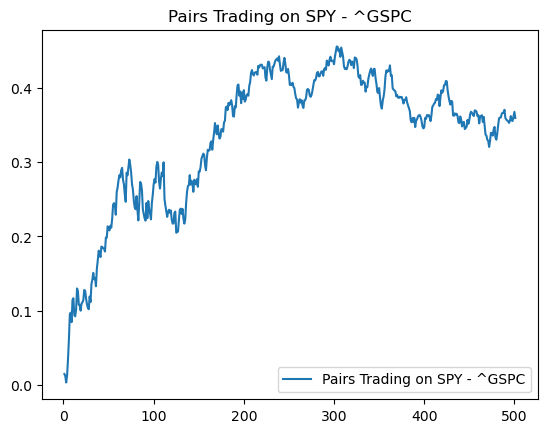

[*********************100%%**********************]  2 of 2 completed

Cointegration test result for F and GM: 0.6204863412042398



C:\Users\ASUS\AppData\Local\Temp\ipykernel_14440\680980566.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  spread = (data[ticker1] - result.params[1] * data[ticker2]) - result.params[0]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14440\680980566.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  positions[f'{ticker2}_position'] = positions[f'{ticker1}_{ticker2}_position'] * result.params[1] * -1


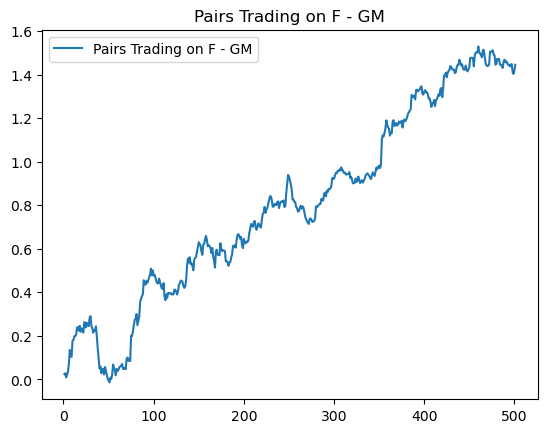

[*********************100%%**********************]  2 of 2 completed


MissingDataError: exog contains inf or nans

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts

# Define the pairs
pairs = {
    "Starhub_Singtel": ["CC3.SI", "Z74.SI"],
    "Bitcoin_Ethereum": ["BTC-USD", "ETH-USD"],
    "USDGBP_USDEUR": ["GBPUSD=X", "EURUSD=X"],
    "SPY_SPX": ["SPY", "^GSPC"],
    "Ford_GM": ["F", "GM"],
    "Airbus_Boeing": ["AIR.PA", "BA"]
}

# Fetch the data using yfinance
def fetch_data(tickers, start="2022-06-01", end="2024-06-01"):
    data = yf.download(tickers, start=start, end=end)
    return data['Close']

# Example function to run pairs trading for a given pair
def pairs_trading(data, ticker1, ticker2, start=200, end=2200):
    # Calculate the cointegration test
    coint_result = ts.coint(data[ticker1].iloc[start:end], data[ticker2].iloc[start:end])[1]
    print(f"Cointegration test result for {ticker1} and {ticker2}: {coint_result}")

    # Linear regression
    result = sm.OLS(data[ticker1].iloc[start:end], sm.add_constant(data[ticker2].iloc[start:end])).fit()
    spread = (data[ticker1] - result.params[1] * data[ticker2]) - result.params[0]
    
    # Position calculation
    positions = pd.DataFrame(index=data.index)
    positions[f'{ticker1}_{ticker2}_position'] = 0
    positions.loc[spread > 0, f'{ticker1}_{ticker2}_position'] = -1
    positions.loc[spread < 0, f'{ticker1}_{ticker2}_position'] = 1
    positions[f'{ticker1}_{ticker2}_position'] = positions[f'{ticker1}_{ticker2}_position'].shift(1)
    
    positions[f'{ticker1}_position'] = positions[f'{ticker1}_{ticker2}_position']
    positions[f'{ticker2}_position'] = positions[f'{ticker1}_{ticker2}_position'] * result.params[1] * -1
    
    return_df = data.pct_change()
    
    pnl = positions[f'{ticker1}_position'] * return_df[ticker1].shift(-1) + positions[f'{ticker2}_position'] * return_df[ticker2].shift(-1)
    cumpnl = pnl.cumsum()

    # Plot cumulative P&L
    plt.plot(cumpnl.values, label=f"Pairs Trading on {ticker1} - {ticker2}")
    plt.title(f"Pairs Trading on {ticker1} - {ticker2}")
    plt.legend()
    plt.show()

# Fetch and process data for each pair
for pair_name, tickers in pairs.items():
    data = fetch_data(tickers)
    pairs_trading(data, tickers[0], tickers[1])

[*********************100%%**********************]  2 of 2 completed
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14440\213717230.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  spread = (data[ticker1] - result.params[1] * data[ticker2]) - result.params[0]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14440\213717230.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  positions[f'{ticker2}_position'] = positions[f'{ticker1}_{ticker2}_position'] * result.params[1] * -1


Cointegration test result for CC3.SI and Z74.SI: 0.945518828592671


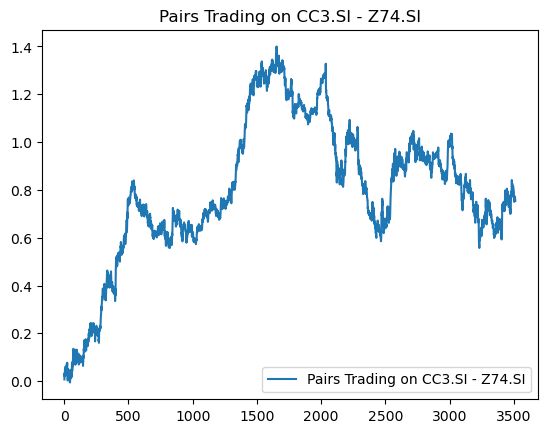

[*********************100%%**********************]  2 of 2 completed


MissingDataError: exog contains inf or nans

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts

# Define the pairs
pairs = {
    "Starhub_Singtel": ["CC3.SI", "Z74.SI"],
    "Bitcoin_Ethereum": ["BTC-USD", "ETH-USD"],
    "USDGBP_USDEUR": ["GBPUSD=X", "EURUSD=X"],
    "SPY_SPX": ["SPY", "^GSPC"],
    "Ford_GM": ["F", "GM"],
    "Airbus_Boeing": ["AIR.PA", "BA"]
}

# Fetch the data using yfinance
def fetch_data(tickers, start="2010-01-01", end="2023-12-31"):
    data = yf.download(tickers, start=start, end=end)
    return data['Close']

# Example function to run pairs trading for a given pair
def pairs_trading(data, ticker1, ticker2, start=200, end=2200):
    # Calculate the cointegration test
    coint_result = ts.coint(data[ticker1].iloc[start:end], data[ticker2].iloc[start:end])[1]
    print(f"Cointegration test result for {ticker1} and {ticker2}: {coint_result}")

    # Linear regression
    result = sm.OLS(data[ticker1].iloc[start:end], sm.add_constant(data[ticker2].iloc[start:end])).fit()
    spread = (data[ticker1] - result.params[1] * data[ticker2]) - result.params[0]
    
    # Position calculation
    positions = pd.DataFrame(index=data.index)
    positions[f'{ticker1}_{ticker2}_position'] = 0
    positions.loc[spread > 0, f'{ticker1}_{ticker2}_position'] = -1
    positions.loc[spread < 0, f'{ticker1}_{ticker2}_position'] = 1
    positions[f'{ticker1}_{ticker2}_position'] = positions[f'{ticker1}_{ticker2}_position'].shift(1)
    
    positions[f'{ticker1}_position'] = positions[f'{ticker1}_{ticker2}_position']
    positions[f'{ticker2}_position'] = positions[f'{ticker1}_{ticker2}_position'] * result.params[1] * -1
    
    return_df = data.pct_change()
    
    pnl = positions[f'{ticker1}_position'] * return_df[ticker1].shift(-1) + positions[f'{ticker2}_position'] * return_df[ticker2].shift(-1)
    cumpnl = pnl.cumsum()

    # Plot cumulative P&L
    plt.plot(cumpnl.values, label=f"Pairs Trading on {ticker1} - {ticker2}")
    plt.title(f"Pairs Trading on {ticker1} - {ticker2}")
    plt.legend()
    plt.show()

# Fetch and process data for each pair
for pair_name, tickers in pairs.items():
    data = fetch_data(tickers)
    pairs_trading(data, tickers[0], tickers[1])

#####TECHNICAL ANALYSIS STOCHASTIC OSCILLATOR####

# Utility method to compute portfolio diagnostics
def portfolioDiagnostics(signal_df, label):
    plt.figure()
    sector_df = pd.read_csv("sector.csv", on_bad_lines='skip')
    d = sector_df.set_index('ticker').to_dict()
    signal_df2 = signal_df.copy(deep=True)
    signal_df2.columns = signal_df2.columns.to_series().map(d['sector'])
    uniquesector = list(set(signal_df2.columns))
    for tsector in uniquesector:
        if str(tsector) == 'nan':
            continue
        tmean = signal_df2.loc[:, tsector].sum(axis=1)
        tmean[~np.isfinite(tmean)] = 0
        plt.plot(tmean.values, label=tsector)
        plt.legend()
        plt.title(label + " NET EXPOSURE")
    plt.show(block=False)

# Utility method to compute P&L diagnostics
def pnlPerformance(pnl, label):
    cumpnl = pnl.cumsum(skipna=True)
    sharpe = pnl.mean() / np.std(pnl)
    sharpe = sharpe * np.sqrt(252)
    print("\nPERFORMANCE STATISTICS FOR " + label)
    print("Daily annualized sharpe: " + str(sharpe))
    print("Average annual returns: " + str(pnl.mean() * 252 * 100) + "%")
    print("Total returns: " + str(pnl.sum() * 100) + "%")
    highwatermark_df = cumpnl.cummax()
    drawdown_df = cumpnl - highwatermark_df
    maxdrawdown = drawdown_df.min()
    print("Max drawdown: " + str(maxdrawdown * 100) + "%")
    plt.plot(cumpnl.values, label=label)
    plt.legend()
    plt.title("Cumulative PNL chart")
    # Performance during stressed historical periods
    stressedmarkets = {
        "Covid19": (20200301, 20200317),
        "Dec18": (20181215, 20181231),
        "Fall2015": (20150701, 20150901),
        "Oct14": (20141001, 20141031),
        "Aug2013": (20130820, 20130825)
    }
    for tkey in stressedmarkets.keys():
        mask = pnl.index.to_series().between(stressedmarkets[tkey][0], stressedmarkets[tkey][1])
        print("Stressed period return during " + tkey + ":  " + str(pnl[mask].sum() * 100) + "%")
    print("===========================")

# Pairs Trading Demonstration
russell_df = pd.read_csv("russell2000pvdata.csv", on_bad_lines='skip')
vars = ['open', 'high', 'low', 'close', 'volume']
rawdata = {}
period = 20
universesize = 2000
maxindividualweight = 0.01

# Using Stochastic Oscillator for mean reversion
for tvar in vars:
    rawdata[tvar] = russell_df.loc[:, ['tickerid', 'ticker', 'date', tvar]]
    rawdata[tvar] = rawdata[tvar].pivot(index='date', columns='ticker', values=tvar)
    rawdata[tvar] = rawdata[tvar].iloc[:, :universesize]

return_df = (rawdata['close'] / rawdata['close'].shift(1)) - 1
signal_df = -(return_df - return_df.rolling(period, min_periods=3).min()) / (return_df.rolling(period, min_periods=3).max() - return_df.rolling(period, min_periods=3).min())
signal_df = signal_df.subtract(signal_df.mean(axis=1), axis='index')
signal_df = signal_df.divide(signal_df.abs().sum(axis=1), axis='index')
signal_df = signal_df.shift(1)
for i in range(3):
    signal_df[signal_df > maxindividualweight] = maxindividualweight
    signal_df[signal_df < -maxindividualweight] = -maxindividualweight
    signal_df = signal_df.subtract(signal_df.mean(axis=1), axis='index')
    signal_df = signal_df.divide(signal_df.abs().sum(axis=1), axis='index')
pnl_df = signal_df * return_df.shift(-1)
pnl = pnl_df.sum(axis=1)
pnlPerformance(pnl, "MARKET NEUTRAL Stochastic Oscillator")
marketneutralportfolio = signal_df.copy(deep=True)
plt.show(block=False)

# Using MA Crossover for momentum signal
signal_df = -(return_df.rolling(3).mean() - return_df.rolling(period, min_periods=3).mean())
signal_df = signal_df.subtract(signal_df.mean(axis=1), axis='index')
signal_df = signal_df.divide(signal_df.abs().sum(axis=1), axis='index')
signal_df = signal_df.shift(1)
for i in range(3):
    signal_df[signal_df > maxindividualweight] = maxindividualweight
    signal_df[signal_df < -maxindividualweight] = -maxindividualweight
    signal_df = signal_df.subtract(signal_df.mean(axis=1), axis='index')
    signal_df = signal_df.divide(signal_df.abs().sum(axis=1), axis='index')
pnl_df = signal_df * return_df.shift(-1)
pnl = pnl_df.sum(axis=1)
pnlPerformance(pnl, "MARKET NEUTRAL MACD Crossover")
marketneutralportfolio = signal_df.copy(deep=True)
plt.show(block=False)

[*********************100%%**********************]  2 of 2 completed

Running pairs trading for Starhub_Singtel...
Cointegration test result for CC3.SI and Z74.SI: 0.043423903641042406

PERFORMANCE STATISTICS FOR CC3.SI-Z74.SI MARKET NEUTRAL Stochastic Oscillator
Daily annualized sharpe: 1.3157689853643542
Average annual returns: 0.32018443748562925%
Total returns: 31.891386432100376%
Max drawdown: -7.960117046458814%



C:\Users\ASUS\AppData\Local\Temp\ipykernel_14440\3680591490.py:62: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  spread = (data[ticker1] - result.params[1] * data[ticker2]) - result.params[0]


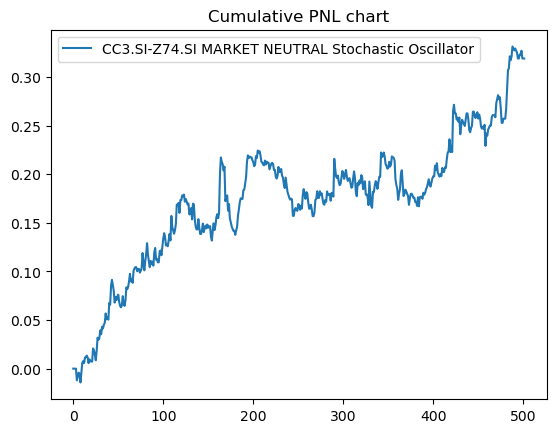


PERFORMANCE STATISTICS FOR CC3.SI-Z74.SI MARKET NEUTRAL MACD Crossover
Daily annualized sharpe: 0.03950943568043465
Average annual returns: 0.00963072319616512%
Total returns: 0.9592506040624782%
Max drawdown: -13.917117596282685%


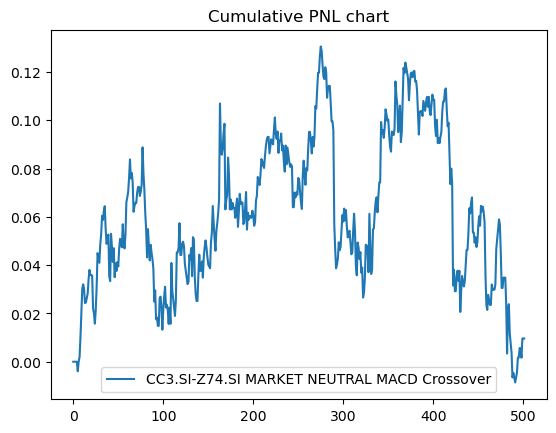

[*********************100%%**********************]  2 of 2 completed

Running pairs trading for Bitcoin_Ethereum...
Cointegration test result for BTC-USD and ETH-USD: 0.17743980373653845
BTC-USD and ETH-USD are not cointegrated
Running pairs trading for USDGBP_USDEUR...



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed

Cointegration test result for GBPUSD=X and EURUSD=X: 0.3240454455174232
GBPUSD=X and EURUSD=X are not cointegrated
Running pairs trading for SPY_SPX...
Cointegration test result for SPY and ^GSPC: 0.07224574314435486

PERFORMANCE STATISTICS FOR SPY-^GSPC MARKET NEUTRAL Stochastic Oscillator
Daily annualized sharpe: 1.2941200633684988
Average annual returns: 0.011697488379927462%
Total returns: 1.1674279077586336%
Max drawdown: -0.4336199054555345%



C:\Users\ASUS\AppData\Local\Temp\ipykernel_14440\3680591490.py:62: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  spread = (data[ticker1] - result.params[1] * data[ticker2]) - result.params[0]


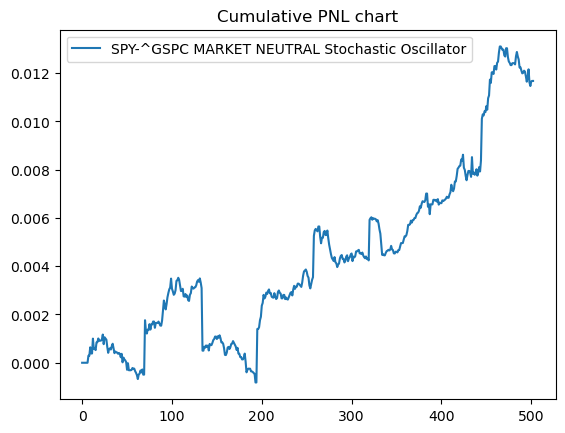


PERFORMANCE STATISTICS FOR SPY-^GSPC MARKET NEUTRAL MACD Crossover
Daily annualized sharpe: -0.26372229658283314
Average annual returns: -0.002771742625121943%
Total returns: -0.27662431357863837%
Max drawdown: -1.155685439155557%


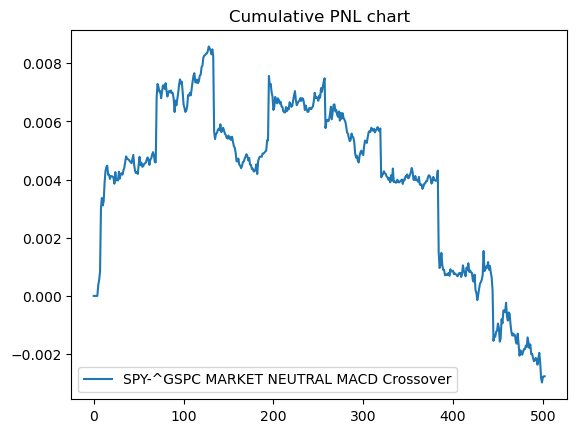

[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed

Running pairs trading for Ford_GM...
Cointegration test result for F and GM: 0.6975786534539017
F and GM are not cointegrated
Running pairs trading for Airbus_Boeing...



[*********************100%%**********************]  2 of 2 completed

Cointegration test result for AIR.PA and BA: 0.3307772130117156
AIR.PA and BA are not cointegrated
Running pairs trading for ExxonMobil_Chevron...
Cointegration test result for XOM and CVX: 0.25290523138149745
XOM and CVX are not cointegrated
Running pairs trading for Pfizer_Moderna...



[*********************100%%**********************]  2 of 2 completed


Cointegration test result for PFE and MRNA: 0.9722458127889526
PFE and MRNA are not cointegrated
Running pairs trading for CocaCola_Pepsi...


[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed

Cointegration test result for KO and PEP: 0.7154737308240909
KO and PEP are not cointegrated
Running pairs trading for Intel_AMD...
Cointegration test result for INTC and AMD: 0.7064578439981408
INTC and AMD are not cointegrated


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts

# Define the pairs (ensure these pairs are generally known to be highly correlated and cointegrated)
pairs = {
    "Starhub_Singtel": ["CC3.SI", "Z74.SI"],
    "Bitcoin_Ethereum": ["BTC-USD", "ETH-USD"],
    "USDGBP_USDEUR": ["GBPUSD=X", "EURUSD=X"],
    "SPY_SPX": ["SPY", "^GSPC"],
    "Ford_GM": ["F", "GM"],
    "Airbus_Boeing": ["AIR.PA", "BA"],
    "ExxonMobil_Chevron": ["XOM", "CVX"],
    "Pfizer_Moderna": ["PFE", "MRNA"],
    "CocaCola_Pepsi": ["KO", "PEP"],
    "Intel_AMD": ["INTC", "AMD"]
}

# Fetch the data using yfinance
def fetch_data(tickers, start="2022-06-06", end="2024-06-06"):
    data = yf.download(tickers, start=start, end=end)
    return data['Close']

# Utility method to compute PnL diagnostics
def pnlPerformance(pnl, label):
    cumpnl = pnl.cumsum(skipna=True)
    sharpe = pnl.mean() / np.std(pnl)
    sharpe = sharpe * np.sqrt(252)
    print("\nPERFORMANCE STATISTICS FOR " + label)
    print("Daily annualized sharpe: " + str(sharpe))
    print("Average annual returns: " + str(pnl.mean() * 252 * 2) + "%")
    print("Total returns: " + str(pnl.sum() * 100) + "%")
    highwatermark_df = cumpnl.cummax()
    drawdown_df = cumpnl - highwatermark_df
    maxdrawdown = drawdown_df.min()
    print("Max drawdown: " + str(maxdrawdown * 100) + "%")
    plt.plot(cumpnl.values, label=label)
    plt.legend()
    plt.title("Cumulative PNL chart")
    plt.show()

# Function to run pairs trading for a given pair
def pairs_trading(data, ticker1, ticker2, start=200, end=400):
    # Drop rows with missing values
    data = data[[ticker1, ticker2]].dropna()
    
    if data.empty or len(data) < end:
        print(f"Not enough data for {ticker1} and {ticker2}")
        return

    # Calculate the cointegration test
    coint_result = ts.coint(data[ticker1].iloc[start:end], data[ticker2].iloc[start:end])[1]
    print(f"Cointegration test result for {ticker1} and {ticker2}: {coint_result}")

    # Ensure they are cointegrated
    if coint_result < 0.1:
        # Linear regression for spread
        result = sm.OLS(data[ticker1].iloc[start:end], sm.add_constant(data[ticker2].iloc[start:end])).fit()
        spread = (data[ticker1] - result.params[1] * data[ticker2]) - result.params[0]

        # Stochastic Oscillator (Mean Reversion)
        period = 20
        maxindividualweight = 0.01
        
        return_df = (data / data.shift(1)) - 1
        signal_df = -(return_df - return_df.rolling(period, min_periods=3).min()) / (return_df.rolling(period, min_periods=3).max() - return_df.rolling(period, min_periods=3).min())
        signal_df = signal_df.subtract(signal_df.mean(axis=1), axis='index')
        signal_df = signal_df.divide(signal_df.abs().sum(axis=1), axis='index')
        signal_df = signal_df.shift(1)
        for i in range(3):
            signal_df[signal_df > maxindividualweight] = maxindividualweight
            signal_df[signal_df < -maxindividualweight] = -maxindividualweight
            signal_df = signal_df.subtract(signal_df.mean(axis=1), axis='index')
            signal_df = signal_df.divide(signal_df.abs().sum(axis=1), axis='index')
        pnl_df = signal_df * return_df.shift(-1)
        pnl = pnl_df.sum(axis=1)
        pnlPerformance(pnl, f"{ticker1}-{ticker2} MARKET NEUTRAL Stochastic Oscillator")

        # MA Crossover (Momentum)
        signal_df = -(return_df.rolling(3).mean() - return_df.rolling(period, min_periods=3).mean())
        signal_df = signal_df.subtract(signal_df.mean(axis=1), axis='index')
        signal_df = signal_df.divide(signal_df.abs().sum(axis=1), axis='index')
        signal_df = signal_df.shift(1)
        for i in range(3):
            signal_df[signal_df > maxindividualweight] = maxindividualweight
            signal_df[signal_df < -maxindividualweight] = -maxindividualweight
            signal_df = signal_df.subtract(signal_df.mean(axis=1), axis='index')
            signal_df = signal_df.divide(signal_df.abs().sum(axis=1), axis='index')
        pnl_df = signal_df * return_df.shift(-1)
        pnl = pnl_df.sum(axis=1)
        pnlPerformance(pnl, f"{ticker1}-{ticker2} MARKET NEUTRAL MACD Crossover")
    else:
        print(f"{ticker1} and {ticker2} are not cointegrated")

# Fetch and process data for each pair
for pair_name, tickers in pairs.items():
    print(f"Running pairs trading for {pair_name}...")
    data = fetch_data(tickers)
    pairs_trading(data, tickers[0], tickers[1])

[*********************100%%**********************]  10 of 10 completed


Best Portfolio: ('NVDA', 'TSLA')
Weights: [3.05311332e-16 1.00000000e+00]
Sharpe Ratio: -0.18788108723850366
Annual Return: 0.5652264568756369
Annual Volatility: 0.6554100813967451


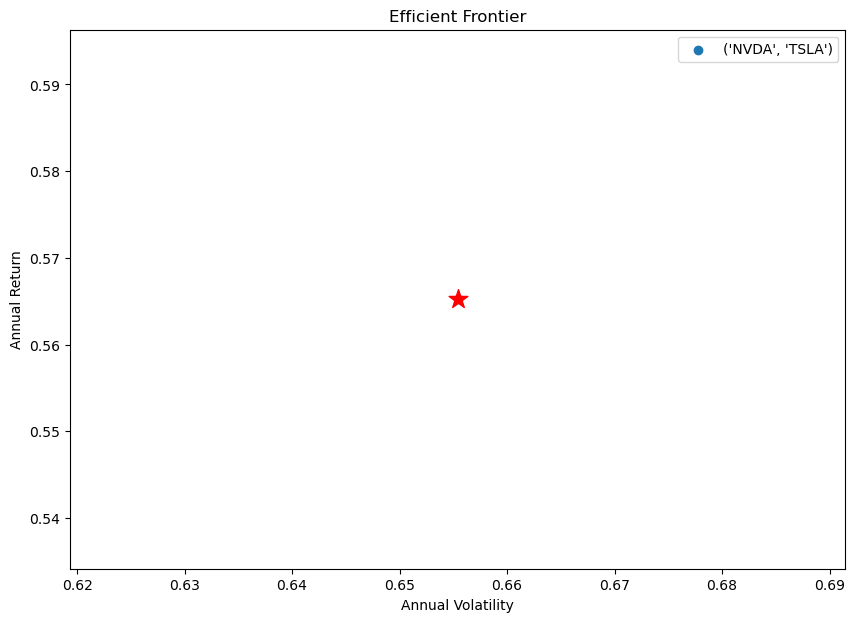

In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import coint
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Function to download historical price data
def download_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    return data

# Function to find highly correlated pairs
def find_correlated_pairs(data, threshold=0.8):
    correlated_pairs = []
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if corr_matrix.iloc[i, j] > threshold:
                correlated_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j]))
    return correlated_pairs

# Function to test for cointegration
def find_cointegrated_pairs(data, correlated_pairs):
    cointegrated_pairs = []
    for pair in correlated_pairs:
        stock1 = data[pair[0]]
        stock2 = data[pair[1]]
        score, p_value, _ = coint(stock1, stock2)
        if p_value < 0.05:  # Assuming a significance level of 5%
            cointegrated_pairs.append(pair)
    return cointegrated_pairs

# Function to calculate portfolio performance
def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns * weights)
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return returns, std

# Function to calculate Sharpe Ratio
def negative_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_returns, p_std = portfolio_performance(weights, mean_returns, cov_matrix)
    return -(p_returns - risk_free_rate) / p_std

# Function to optimize portfolio
def optimize_portfolio(data, cointegrated_pairs, risk_free_rate=0.01):
    portfolios = {}
    for pair in cointegrated_pairs:
        stocks = list(pair)
        returns = data[stocks].pct_change().dropna()
        mean_returns = returns.mean()
        cov_matrix = returns.cov()
        
        num_assets = len(stocks)
        args = (mean_returns, cov_matrix, risk_free_rate)
        constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
        bounds = tuple((0, 1) for _ in range(num_assets))
        
        result = minimize(negative_sharpe_ratio, num_assets * [1. / num_assets], args=args,
                          method='SLSQP', bounds=bounds, constraints=constraints)
        
        portfolios[pair] = {
            'weights': result.x,
            'sharpe_ratio': -result.fun,
            'annual_return': np.sum(mean_returns * result.x) * 252,
            'annual_volatility': np.sqrt(np.dot(result.x.T, np.dot(cov_matrix, result.x))) * np.sqrt(252)
        }
    return portfolios

# Define tickers and date range
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'NFLX', 'NVDA', 'ADBE', 'PYPL']
start_date = '2018-01-01'
end_date = '2023-01-01'

# Download data
data = download_data(tickers, start_date, end_date)

# Find highly correlated pairs
correlated_pairs = find_correlated_pairs(data)

# Find cointegrated pairs among correlated pairs
cointegrated_pairs = find_cointegrated_pairs(data, correlated_pairs)

# Optimize portfolio based on cointegrated pairs
portfolios = optimize_portfolio(data, cointegrated_pairs)

# Find the portfolio with the highest Sharpe ratio
best_portfolio = max(portfolios.items(), key=lambda x: x[1]['sharpe_ratio'])

print(f"Best Portfolio: {best_portfolio[0]}")
print(f"Weights: {best_portfolio[1]['weights']}")
print(f"Sharpe Ratio: {best_portfolio[1]['sharpe_ratio']}")
print(f"Annual Return: {best_portfolio[1]['annual_return']}")
print(f"Annual Volatility: {best_portfolio[1]['annual_volatility']}")

# Plotting the efficient frontier (optional)
plt.figure(figsize=(10, 7))
for pair, stats in portfolios.items():
    plt.scatter(stats['annual_volatility'], stats['annual_return'], label=str(pair))
plt.scatter(best_portfolio[1]['annual_volatility'], best_portfolio[1]['annual_return'], color='red', marker='*', s=200)
plt.title('Efficient Frontier')
plt.xlabel('Annual Volatility')
plt.ylabel('Annual Return')
plt.legend()
plt.show()

Running pairs trading for AAPL and GOOGL from NASDAQ exchange...


[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Cointegration test result for AAPL and GOOGL: 0.4741990775846557
AAPL and GOOGL are not cointegrated
Running pairs trading for AMZN and TSLA from NASDAQ exchange...
Cointegration test result for AMZN and TSLA: 0.9732435339913793
AMZN and TSLA are not cointegrated
Running pairs trading for MSFT and NFLX from NASDAQ exchange...
Cointegration test result for MSFT and NFLX: 0.42275328787130956
MSFT and NFLX are not cointegrated
Running pairs trading for BP and SHEL from LSE exchange...


[*********************100%%**********************]  2 of 2 completed


Cointegration test result for BP and SHEL: 0.5887090220095618
BP and SHEL are not cointegrated
Running pairs trading for TOT and ENI from LSE exchange...


[*********************100%%**********************]  2 of 2 completed

2 Failed downloads:
['TOT']: Exception('%ticker%: No timezone found, symbol may be delisted')
['ENI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-06-01 -> 2024-06-01)')


Not enough data for TOT and ENI
Running pairs trading for RDSA and EQNR from LSE exchange...


[*********************100%%**********************]  2 of 2 completed

1 Failed download:
['RDSA']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed

Not enough data for RDSA and EQNR
Running pairs trading for BABA and TCEHY from HKEX exchange...
Cointegration test result for BABA and TCEHY: 0.5912283066594466
BABA and TCEHY are not cointegrated
Running pairs trading for JD and PDD from HKEX exchange...



[*********************100%%**********************]  2 of 2 completed


Cointegration test result for JD and PDD: 0.33847864976563424
JD and PDD are not cointegrated
Running pairs trading for NTES and BIDU from HKEX exchange...
Cointegration test result for NTES and BIDU: 0.588176836216294
NTES and BIDU are not cointegrated
Running pairs trading for RELIANCE.BO and TCS.BO from BSE exchange...


[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Cointegration test result for RELIANCE.BO and TCS.BO: 0.16246183487625054
RELIANCE.BO and TCS.BO are not cointegrated
Running pairs trading for INFY.BO and HDFCBANK.BO from BSE exchange...
Cointegration test result for INFY.BO and HDFCBANK.BO: 0.1770861149796482
INFY.BO and HDFCBANK.BO are not cointegrated
Running pairs trading for ICICIBANK.BO and SBIN.BO from BSE exchange...


[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed

Cointegration test result for ICICIBANK.BO and SBIN.BO: 0.17621166791262854
ICICIBANK.BO and SBIN.BO are not cointegrated
Running pairs trading for SONY and TOYOF from TSE exchange...
Cointegration test result for SONY and TOYOF: 0.42688452170795965
SONY and TOYOF are not cointegrated
Running pairs trading for SNE and NTDOY from TSE exchange...



[*********************100%%**********************]  2 of 2 completed

1 Failed download:
['SNE']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  2 of 2 completed


Not enough data for SNE and NTDOY
Running pairs trading for TM and NMR from TSE exchange...
Cointegration test result for TM and NMR: 0.572600118981177
TM and NMR are not cointegrated
Running pairs trading for SIEGY and SAP from FWB exchange...


[*********************100%%**********************]  2 of 2 completed


Cointegration test result for SIEGY and SAP: 0.36218962591282555
SIEGY and SAP are not cointegrated
Running pairs trading for DDAIF and VOW3 from FWB exchange...


[*********************100%%**********************]  2 of 2 completed

2 Failed downloads:
['DDAIF', 'VOW3']: Exception('%ticker%: No timezone found, symbol may be delisted')


Not enough data for DDAIF and VOW3
Running pairs trading for BAS and ALV from FWB exchange...


[*********************100%%**********************]  2 of 2 completed

1 Failed download:
['BAS']: Exception('%ticker%: No timezone found, symbol may be delisted')
[                       0%%                      ]

Not enough data for BAS and ALV
Running pairs trading for AIR.PA and OR.PA from Euronext exchange...


[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Cointegration test result for AIR.PA and OR.PA: 0.10031742192608495
AIR.PA and OR.PA are not cointegrated
Running pairs trading for MC.PA and BN.PA from Euronext exchange...
Cointegration test result for MC.PA and BN.PA: 0.3819472127889595
MC.PA and BN.PA are not cointegrated
Running pairs trading for CAP.PA and DG.PA from Euronext exchange...


[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Cointegration test result for CAP.PA and DG.PA: 0.36054391182575385
CAP.PA and DG.PA are not cointegrated
Running pairs trading for NVS and ROG from SIX exchange...
Cointegration test result for NVS and ROG: 0.4582668076254436
NVS and ROG are not cointegrated
Running pairs trading for UBSG and CSGN from SIX exchange...


[*********************100%%**********************]  2 of 2 completed

2 Failed downloads:
['UBSG']: Exception('%ticker%: No timezone found, symbol may be delisted')
['CSGN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-06-01 -> 2024-06-01)')


Not enough data for UBSG and CSGN
Running pairs trading for ZURN and SCMN from SIX exchange...


[*********************100%%**********************]  2 of 2 completed

2 Failed downloads:
['SCMN', 'ZURN']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  2 of 2 completed


Not enough data for ZURN and SCMN
Running pairs trading for VALE and PBR from Bovespa exchange...
Cointegration test result for VALE and PBR: 0.006670956355822471


C:\Users\ASUS\AppData\Local\Temp\ipykernel_22100\3452338599.py:62: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  spread = (data[ticker1] - result.params[1] * data[ticker2]) - result.params[0]



PERFORMANCE STATISTICS FOR VALE-PBR MARKET NEUTRAL Stochastic Oscillator
Daily annualized sharpe: 1.3325908281505892
Average annual returns: 0.5572390460049558%
Total returns: 55.61334129771682%
Max drawdown: -31.73958031113785%


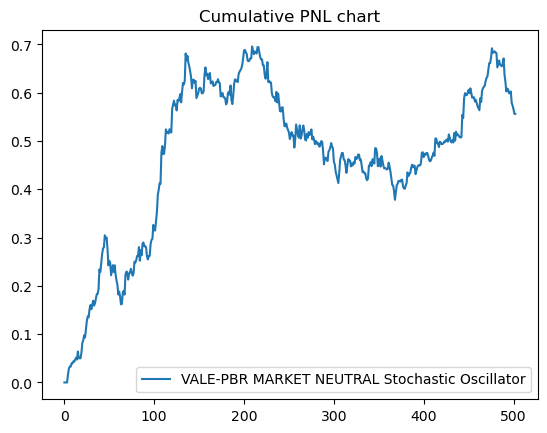


PERFORMANCE STATISTICS FOR VALE-PBR MARKET NEUTRAL MACD Crossover
Daily annualized sharpe: -0.47104078334123983
Average annual returns: -0.19910301829270627%
Total returns: -19.870797262149058%
Max drawdown: -32.97590413594203%


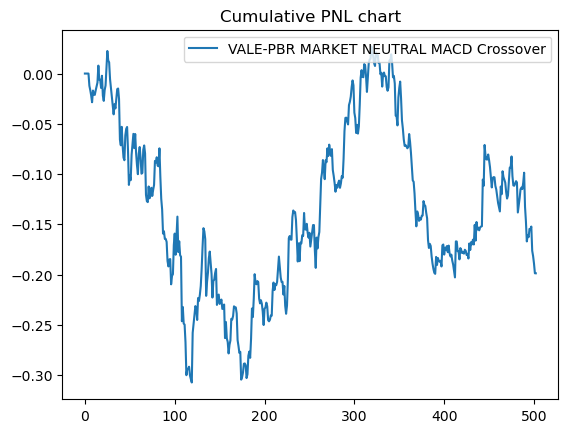

Running pairs trading for ITUB and BBD from Bovespa exchange...


[*********************100%%**********************]  2 of 2 completed

Cointegration test result for ITUB and BBD: 0.8091963014303052
ITUB and BBD are not cointegrated
Running pairs trading for ABEV and GGB from Bovespa exchange...



[*********************100%%**********************]  2 of 2 completed


Cointegration test result for ABEV and GGB: 0.4113229954183228
ABEV and GGB are not cointegrated
Running pairs trading for BHP and CBA from ASX exchange...


[*********************100%%**********************]  2 of 2 completed
C:\Users\ASUS\AppData\Local\Temp\ipykernel_22100\3452338599.py:62: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  spread = (data[ticker1] - result.params[1] * data[ticker2]) - result.params[0]


Cointegration test result for BHP and CBA: 0.015639067469988572

PERFORMANCE STATISTICS FOR BHP-CBA MARKET NEUTRAL Stochastic Oscillator
Daily annualized sharpe: -0.3428708067711447
Average annual returns: -0.5757803432167935%
Total returns: -56.664097268954286%
Max drawdown: -179.48717653041686%


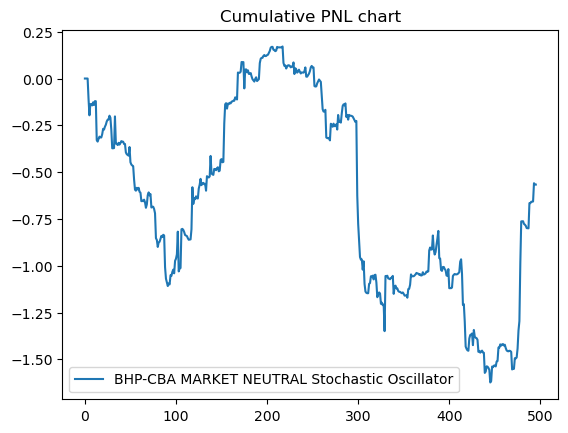


PERFORMANCE STATISTICS FOR BHP-CBA MARKET NEUTRAL MACD Crossover
Daily annualized sharpe: -0.512457731702591
Average annual returns: -0.8643038826811076%
Total returns: -85.05847734322012%
Max drawdown: -142.88157678170253%


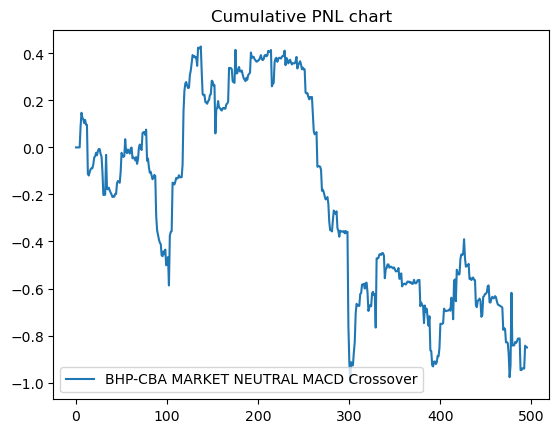

Running pairs trading for NAB and WBC from ASX exchange...


[*********************100%%**********************]  2 of 2 completed

2 Failed downloads:
['WBC']: Exception('%ticker%: No timezone found, symbol may be delisted')
['NAB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-06-01 -> 2024-06-01)')
[*********************100%%**********************]  2 of 2 completed

1 Failed download:
['ANZ']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-06-01 -> 2024-06-01)')


Not enough data for NAB and WBC
Running pairs trading for ANZ and WES from ASX exchange...
Not enough data for ANZ and WES


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts

# Define the pairs (ensure these pairs are generally known to be highly correlated and cointegrated)
pairs = {
    'NASDAQ': ['AAPL', 'GOOGL', 'AMZN', 'TSLA', 'MSFT', 'NFLX'],
    'LSE': ['BP', 'SHEL', 'TOT', 'ENI', 'RDSA', 'EQNR'],
    'HKEX': ['BABA', 'TCEHY', 'JD', 'PDD', 'NTES', 'BIDU'],
    'BSE': ['RELIANCE.BO', 'TCS.BO', 'INFY.BO', 'HDFCBANK.BO', 'ICICIBANK.BO', 'SBIN.BO'],
    'TSE': ['SONY', 'TOYOF', 'SNE', 'NTDOY', 'TM', 'NMR'],
    'FWB': ['SIEGY', 'SAP', 'DDAIF', 'VOW3', 'BAS', 'ALV'],
    'Euronext': ['AIR.PA', 'OR.PA', 'MC.PA', 'BN.PA', 'CAP.PA', 'DG.PA'],
    'SIX': ['NVS', 'ROG', 'UBSG', 'CSGN', 'ZURN', 'SCMN'],
    'Bovespa': ['VALE', 'PBR', 'ITUB', 'BBD', 'ABEV', 'GGB'],
    'ASX': ['BHP', 'CBA', 'NAB', 'WBC', 'ANZ', 'WES']
}

# Fetch the data using yfinance
def fetch_data(tickers, start="2022-06-01", end="2024-06-01"):
    data = yf.download(tickers, start=start, end=end)
    return data['Close']

# Utility method to compute PnL diagnostics
def pnl_performance(pnl, label):
    cumpnl = pnl.cumsum(skipna=True)
    sharpe = pnl.mean() / np.std(pnl)
    sharpe = sharpe * np.sqrt(252)
    print("\nPERFORMANCE STATISTICS FOR " + label)
    print("Daily annualized sharpe: " + str(sharpe))
    print("Average annual returns: " + str(pnl.mean() * 252 * 2) + "%")
    print("Total returns: " + str(pnl.sum() * 100) + "%")
    highwatermark_df = cumpnl.cummax()
    drawdown_df = cumpnl - highwatermark_df
    maxdrawdown = drawdown_df.min()
    print("Max drawdown: " + str(maxdrawdown * 100) + "%")
    plt.plot(cumpnl.values, label=label)
    plt.legend()
    plt.title("Cumulative PNL chart")
    plt.show()

# Function to run pairs trading for a given pair
def pairs_trading(data, ticker1, ticker2):
    # Drop rows with missing values
    data = data[[ticker1, ticker2]].dropna()
    
    if data.empty or len(data) < 200:
        print(f"Not enough data for {ticker1} and {ticker2}")
        return

    # Calculate the cointegration test
    coint_result = ts.coint(data[ticker1], data[ticker2])[1]
    print(f"Cointegration test result for {ticker1} and {ticker2}: {coint_result}")

    # Ensure they are cointegrated
    if coint_result < 0.1:
        # Linear regression for spread
        result = sm.OLS(data[ticker1], sm.add_constant(data[ticker2])).fit()
        spread = (data[ticker1] - result.params[1] * data[ticker2]) - result.params[0]

        # Stochastic Oscillator (Mean Reversion)
        period = 20
        maxindividualweight = 0.01
        
        return_df = (data / data.shift(1)) - 1
        signal_df = -(return_df - return_df.rolling(period, min_periods=3).min()) / (return_df.rolling(period, min_periods=3).max() - return_df.rolling(period, min_periods=3).min())
        signal_df = signal_df.subtract(signal_df.mean(axis=1), axis='index')
        signal_df = signal_df.divide(signal_df.abs().sum(axis=1), axis='index')
        signal_df = signal_df.shift(1)
        for i in range(3):
            signal_df[signal_df > maxindividualweight] = maxindividualweight
            signal_df[signal_df < -maxindividualweight] = -maxindividualweight
            signal_df = signal_df.subtract(signal_df.mean(axis=1), axis='index')
            signal_df = signal_df.divide(signal_df.abs().sum(axis=1), axis='index')
        pnl_df = signal_df * return_df.shift(-1)
        pnl = pnl_df.sum(axis=1)
        pnl_performance(pnl, f"{ticker1}-{ticker2} MARKET NEUTRAL Stochastic Oscillator")

        # MA Crossover (Momentum)
        signal_df = -(return_df.rolling(3).mean() - return_df.rolling(period, min_periods=3).mean())
        signal_df = signal_df.subtract(signal_df.mean(axis=1), axis='index')
        signal_df = signal_df.divide(signal_df.abs().sum(axis=1), axis='index')
        signal_df = signal_df.shift(1)
        for i in range(3):
            signal_df[signal_df > maxindividualweight] = maxindividualweight
            signal_df[signal_df < -maxindividualweight] = -maxindividualweight
            signal_df = signal_df.subtract(signal_df.mean(axis=1), axis='index')
            signal_df = signal_df.divide(signal_df.abs().sum(axis=1), axis='index')
        pnl_df = signal_df * return_df.shift(-1)
        pnl = pnl_df.sum(axis=1)
        pnl_performance(pnl, f"{ticker1}-{ticker2} MARKET NEUTRAL MACD Crossover")
    else:
        print(f"{ticker1} and {ticker2} are not cointegrated")

# Fetch and process data for each pair
for exchange, tickers in pairs.items():
    for i in range(0, len(tickers), 2):
        if i+1 < len(tickers):
            ticker1 = tickers[i]
            ticker2 = tickers[i+1]
            print(f"Running pairs trading for {ticker1} and {ticker2} from {exchange} exchange...")
            data = fetch_data([ticker1, ticker2])
            pairs_trading(data, ticker1, ticker2)

Running pairs trading for AAPL and GOOGL from NASDAQ exchange...


[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed

Cointegration test result for AAPL and GOOGL: 0.4741990775846557
AAPL and GOOGL are not cointegrated
Running pairs trading for AMZN and TSLA from NASDAQ exchange...
Cointegration test result for AMZN and TSLA: 0.9732435339913793
AMZN and TSLA are not cointegrated
Running pairs trading for MSFT and NFLX from NASDAQ exchange...
Cointegration test result for MSFT and NFLX: 0.42275328787130956
MSFT and NFLX are not cointegrated
Running pairs trading for BP and SHEL from LSE exchange...



[*********************100%%**********************]  2 of 2 completed
[                       0%%                      ]

Cointegration test result for BP and SHEL: 0.5887090220095618
BP and SHEL are not cointegrated
Running pairs trading for TOT and ENI from LSE exchange...


[*********************100%%**********************]  2 of 2 completed

2 Failed downloads:
['ENI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-06-01 -> 2024-06-01)')
['TOT']: Exception('%ticker%: No timezone found, symbol may be delisted')
[                       0%%                      ]

Not enough data for TOT and ENI
Running pairs trading for RDSA and EQNR from LSE exchange...


[*********************100%%**********************]  2 of 2 completed

1 Failed download:
['RDSA']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  2 of 2 completed


Not enough data for RDSA and EQNR
Running pairs trading for BABA and TCEHY from HKEX exchange...
Cointegration test result for BABA and TCEHY: 0.5912283066594466
BABA and TCEHY are not cointegrated
Running pairs trading for JD and PDD from HKEX exchange...


[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed

Cointegration test result for JD and PDD: 0.33847864976563424
JD and PDD are not cointegrated
Running pairs trading for NTES and BIDU from HKEX exchange...
Cointegration test result for NTES and BIDU: 0.588176836216294
NTES and BIDU are not cointegrated
Running pairs trading for RELIANCE.BO and TCS.BO from BSE exchange...
Cointegration test result for RELIANCE.BO and TCS.BO: 0.16246183487625054
RELIANCE.BO and TCS.BO are not cointegrated
Running pairs trading for INFY.BO and HDFCBANK.BO from BSE exchange...



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Cointegration test result for INFY.BO and HDFCBANK.BO: 0.1770861149796482
INFY.BO and HDFCBANK.BO are not cointegrated
Running pairs trading for ICICIBANK.BO and SBIN.BO from BSE exchange...
Cointegration test result for ICICIBANK.BO and SBIN.BO: 0.17621166791262854
ICICIBANK.BO and SBIN.BO are not cointegrated
Running pairs trading for SONY and TOYOF from TSE exchange...


[*********************100%%**********************]  2 of 2 completed
[                       0%%                      ]

Cointegration test result for SONY and TOYOF: 0.42688452170795965
SONY and TOYOF are not cointegrated
Running pairs trading for SNE and NTDOY from TSE exchange...


[*********************100%%**********************]  2 of 2 completed

1 Failed download:
['SNE']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed

Not enough data for SNE and NTDOY
Running pairs trading for TM and NMR from TSE exchange...
Cointegration test result for TM and NMR: 0.572600118981177
TM and NMR are not cointegrated
Running pairs trading for SIEGY and SAP from FWB exchange...


Cointegration test result for SIEGY and SAP: 0.36218962591282555
SIEGY and SAP are not cointegrated
Running pairs trading for DDAIF and VOW3 from FWB exchange...


[*********************100%%**********************]  2 of 2 completed

2 Failed downloads:
['VOW3', 'DDAIF']: Exception('%ticker%: No timezone found, symbol may be delisted')


Not enough data for DDAIF and VOW3
Running pairs trading for BAS and ALV from FWB exchange...


[*********************100%%**********************]  2 of 2 completed

1 Failed download:
['BAS']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  2 of 2 completed


Not enough data for BAS and ALV
Running pairs trading for AIR.PA and OR.PA from Euronext exchange...
Cointegration test result for AIR.PA and OR.PA: 0.10031742192608495
AIR.PA and OR.PA are not cointegrated
Running pairs trading for MC.PA and BN.PA from Euronext exchange...


[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[                       0%%                      ]

Cointegration test result for MC.PA and BN.PA: 0.3819472127889595
MC.PA and BN.PA are not cointegrated
Running pairs trading for CAP.PA and DG.PA from Euronext exchange...
Cointegration test result for CAP.PA and DG.PA: 0.36054391182575385
CAP.PA and DG.PA are not cointegrated
Running pairs trading for NVS and ROG from SIX exchange...


[*********************100%%**********************]  2 of 2 completed


Cointegration test result for NVS and ROG: 0.4582668076254436
NVS and ROG are not cointegrated
Running pairs trading for UBSG and CSGN from SIX exchange...


[*********************100%%**********************]  2 of 2 completed

2 Failed downloads:
['CSGN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-06-01 -> 2024-06-01)')
['UBSG']: Exception('%ticker%: No timezone found, symbol may be delisted')


Not enough data for UBSG and CSGN
Running pairs trading for ZURN and SCMN from SIX exchange...


[*********************100%%**********************]  2 of 2 completed

2 Failed downloads:
['ZURN', 'SCMN']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  2 of 2 completed
C:\Users\ASUS\AppData\Local\Temp\ipykernel_22100\744481030.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  spread = (data[ticker1] - result.params[1] * data[ticker2]) - result.params[0]


Not enough data for ZURN and SCMN
Running pairs trading for VALE and PBR from Bovespa exchange...
Cointegration test result for VALE and PBR: 0.006670956355822471

PERFORMANCE STATISTICS FOR VALE-PBR MARKET NEUTRAL Stochastic Oscillator
Daily annualized sharpe: 1.3325908281505892
Average annual returns: 0.5572390460049558%
Total returns: 55.61334129771682%
Max drawdown: -31.73958031113785%


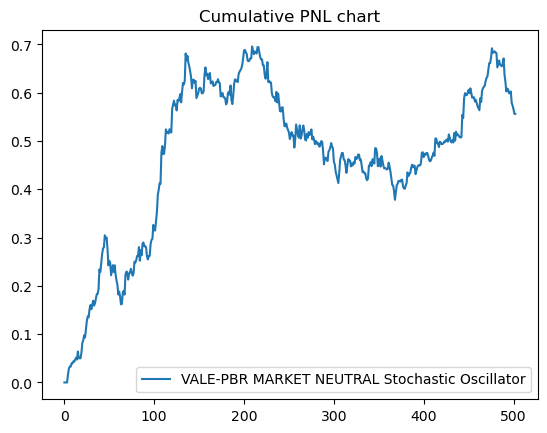


PERFORMANCE STATISTICS FOR VALE-PBR MARKET NEUTRAL MACD Crossover
Daily annualized sharpe: -0.47104078334123983
Average annual returns: -0.19910301829270627%
Total returns: -19.870797262149058%
Max drawdown: -32.97590413594203%


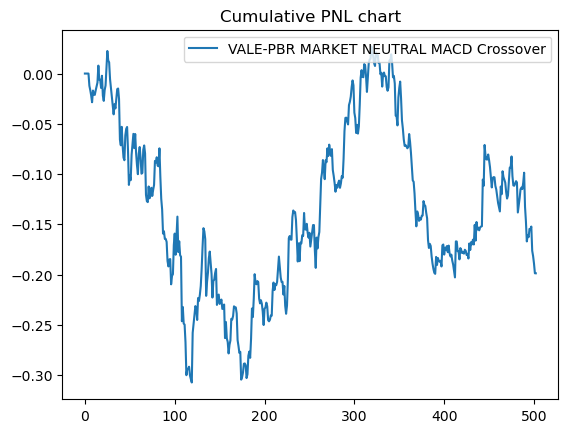

Running pairs trading for ITUB and BBD from Bovespa exchange...


[*********************100%%**********************]  2 of 2 completed

Cointegration test result for ITUB and BBD: 0.8091963014303052
ITUB and BBD are not cointegrated
Running pairs trading for ABEV and GGB from Bovespa exchange...



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
C:\Users\ASUS\AppData\Local\Temp\ipykernel_22100\744481030.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  spread = (data[ticker1] - result.params[1] * data[ticker2]) - result.params[0]


Cointegration test result for ABEV and GGB: 0.4113229954183228
ABEV and GGB are not cointegrated
Running pairs trading for BHP and CBA from ASX exchange...
Cointegration test result for BHP and CBA: 0.015639067469988572

PERFORMANCE STATISTICS FOR BHP-CBA MARKET NEUTRAL Stochastic Oscillator
Daily annualized sharpe: -0.3428708067711447
Average annual returns: -0.5757803432167935%
Total returns: -56.664097268954286%
Max drawdown: -179.48717653041686%


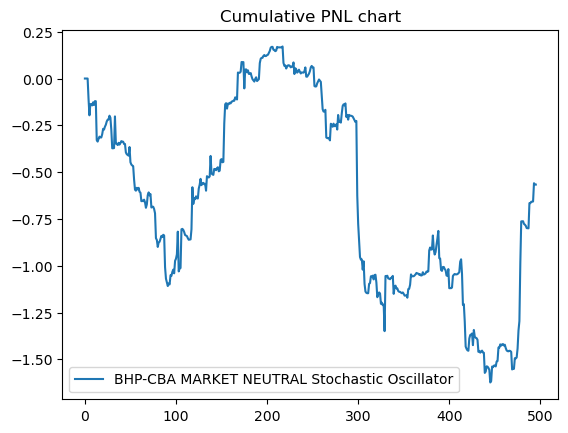


PERFORMANCE STATISTICS FOR BHP-CBA MARKET NEUTRAL MACD Crossover
Daily annualized sharpe: -0.512457731702591
Average annual returns: -0.8643038826811076%
Total returns: -85.05847734322012%
Max drawdown: -142.88157678170253%


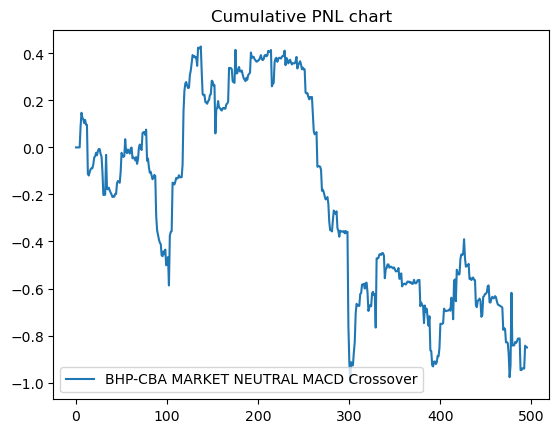

[*********************100%%**********************]  2 of 2 completed

2 Failed downloads:
['WBC']: Exception('%ticker%: No timezone found, symbol may be delisted')
['NAB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-06-01 -> 2024-06-01)')
[*********************100%%**********************]  2 of 2 completed

1 Failed download:
['ANZ']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-06-01 -> 2024-06-01)')


Running pairs trading for NAB and WBC from ASX exchange...
Not enough data for NAB and WBC
Running pairs trading for ANZ and WES from ASX exchange...
Not enough data for ANZ and WES
Running pairs trading for GC=F and SI=F from Commodities exchange...


[*********************100%%**********************]  2 of 2 completed
[                       0%%                      ]

Cointegration test result for GC=F and SI=F: 0.2338392823247767
GC=F and SI=F are not cointegrated
Running pairs trading for CL=F and NG=F from Commodities exchange...


[*********************100%%**********************]  2 of 2 completed
C:\Users\ASUS\AppData\Local\Temp\ipykernel_22100\744481030.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  spread = (data[ticker1] - result.params[1] * data[ticker2]) - result.params[0]


Cointegration test result for CL=F and NG=F: 0.0064231150041713266

PERFORMANCE STATISTICS FOR CL=F-NG=F MARKET NEUTRAL Stochastic Oscillator
Daily annualized sharpe: 0.4184339867398177
Average annual returns: 0.3446554330977499%
Total returns: 34.465543309774986%
Max drawdown: -65.50665955065949%


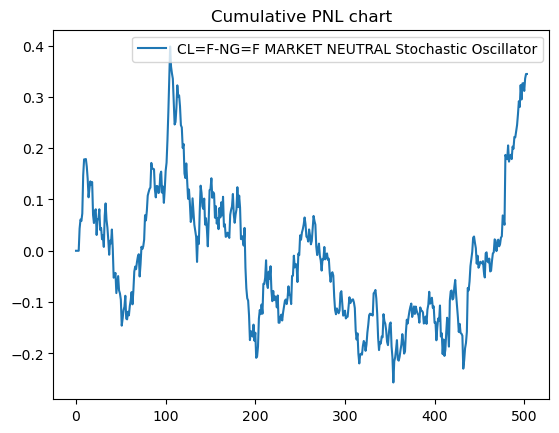


PERFORMANCE STATISTICS FOR CL=F-NG=F MARKET NEUTRAL MACD Crossover
Daily annualized sharpe: -0.785195260802917
Average annual returns: -0.6456721432007019%
Total returns: -64.56721432007019%
Max drawdown: -89.37176194122283%


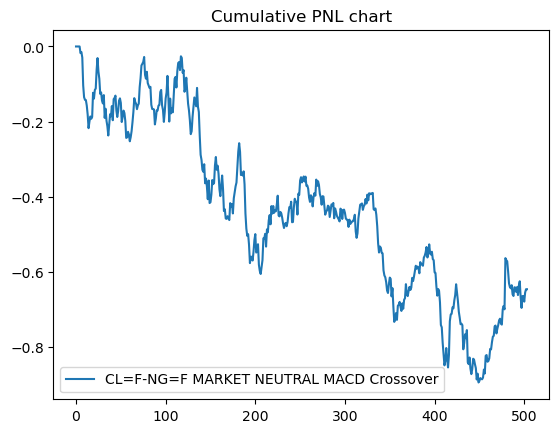

[                       0%%                      ]

Running pairs trading for HG=F and PA=F from Commodities exchange...


[*********************100%%**********************]  2 of 2 completed
[                       0%%                      ]

Cointegration test result for HG=F and PA=F: 0.15886192964380957
HG=F and PA=F are not cointegrated
Running pairs trading for BTC-USD and ETH-USD from Cryptos exchange...


[*********************100%%**********************]  2 of 2 completed
C:\Users\ASUS\AppData\Local\Temp\ipykernel_22100\744481030.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  spread = (data[ticker1] - result.params[1] * data[ticker2]) - result.params[0]


Cointegration test result for BTC-USD and ETH-USD: 0.01436125867084807

PERFORMANCE STATISTICS FOR BTC-USD-ETH-USD MARKET NEUTRAL Stochastic Oscillator
Daily annualized sharpe: 0.3567746109171662
Average annual returns: 0.1026134222052249%
Total returns: 14.883018180956231%
Max drawdown: -15.350598527122989%


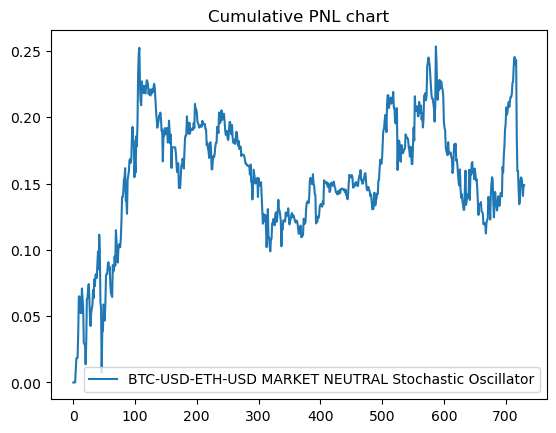


PERFORMANCE STATISTICS FOR BTC-USD-ETH-USD MARKET NEUTRAL MACD Crossover
Daily annualized sharpe: -0.2493270180964352
Average annual returns: -0.07439049890603049%
Total returns: -10.789574345299263%
Max drawdown: -36.4786459405126%


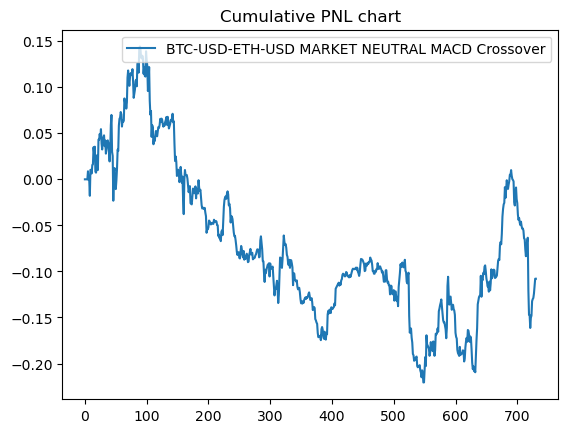

Running pairs trading for BNB-USD and USDT-USD from Cryptos exchange...


[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed

Cointegration test result for BNB-USD and USDT-USD: 0.9899615177647799
BNB-USD and USDT-USD are not cointegrated
Running pairs trading for ADA-USD and SOL-USD from Cryptos exchange...


Cointegration test result for ADA-USD and SOL-USD: 0.3275183018525243
ADA-USD and SOL-USD are not cointegrated
Running pairs trading for SPY and QQQ from ETFs exchange...


[*********************100%%**********************]  2 of 2 completed


Cointegration test result for SPY and QQQ: 0.6436536431109403
SPY and QQQ are not cointegrated
Running pairs trading for IVV and VTI from ETFs exchange...


[*********************100%%**********************]  2 of 2 completed


Cointegration test result for IVV and VTI: 0.03271283468186285

PERFORMANCE STATISTICS FOR IVV-VTI MARKET NEUTRAL Stochastic Oscillator
Daily annualized sharpe: -0.1402324008151197
Average annual returns: -0.002696692504669111%
Total returns: -0.26913419243027037%
Max drawdown: -1.2635825172581938%


C:\Users\ASUS\AppData\Local\Temp\ipykernel_22100\744481030.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  spread = (data[ticker1] - result.params[1] * data[ticker2]) - result.params[0]


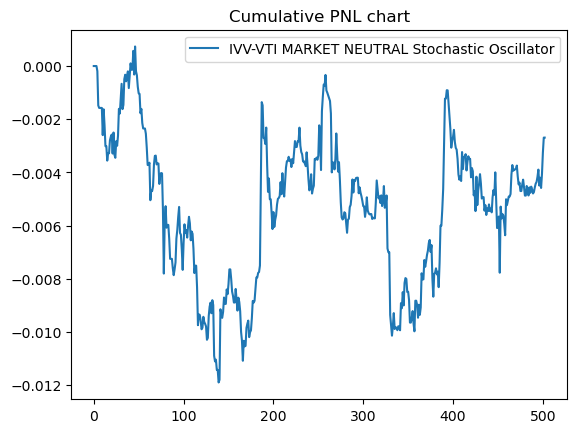


PERFORMANCE STATISTICS FOR IVV-VTI MARKET NEUTRAL MACD Crossover
Daily annualized sharpe: -0.32373239930200165
Average annual returns: -0.006481396464827906%
Total returns: -0.6468536551207216%
Max drawdown: -1.6516151316346817%


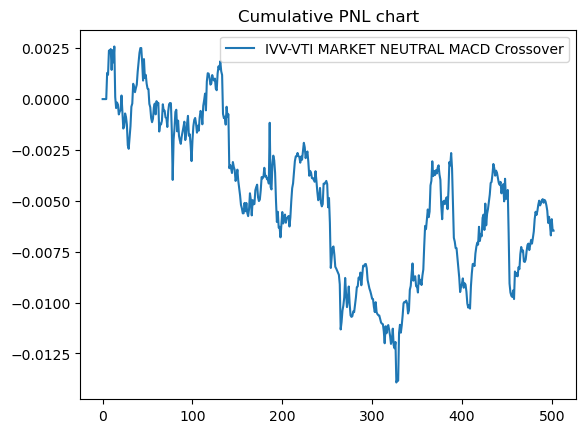

Running pairs trading for VOO and DIA from ETFs exchange...


[*********************100%%**********************]  2 of 2 completed

Cointegration test result for VOO and DIA: 0.7609932225123937
VOO and DIA are not cointegrated


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts

# Define the pairs (ensure these pairs are generally known to be highly correlated and cointegrated)
pairs = {
    'NASDAQ': ['AAPL', 'GOOGL', 'AMZN', 'TSLA', 'MSFT', 'NFLX'],
    'LSE': ['BP', 'SHEL', 'TOT', 'ENI', 'RDSA', 'EQNR'],
    'HKEX': ['BABA', 'TCEHY', 'JD', 'PDD', 'NTES', 'BIDU'],
    'BSE': ['RELIANCE.BO', 'TCS.BO', 'INFY.BO', 'HDFCBANK.BO', 'ICICIBANK.BO', 'SBIN.BO'],
    'TSE': ['SONY', 'TOYOF', 'SNE', 'NTDOY', 'TM', 'NMR'],
    'FWB': ['SIEGY', 'SAP', 'DDAIF', 'VOW3', 'BAS', 'ALV'],
    'Euronext': ['AIR.PA', 'OR.PA', 'MC.PA', 'BN.PA', 'CAP.PA', 'DG.PA'],
    'SIX': ['NVS', 'ROG', 'UBSG', 'CSGN', 'ZURN', 'SCMN'],
    'Bovespa': ['VALE', 'PBR', 'ITUB', 'BBD', 'ABEV', 'GGB'],
    'ASX': ['BHP', 'CBA', 'NAB', 'WBC', 'ANZ', 'WES'],
    'Commodities': ['GC=F', 'SI=F', 'CL=F', 'NG=F', 'HG=F', 'PA=F'],  # Gold, Silver, Crude Oil, Natural Gas, Copper, Palladium
    'Cryptos': ['BTC-USD', 'ETH-USD', 'BNB-USD', 'USDT-USD', 'ADA-USD', 'SOL-USD'],
    'ETFs': ['SPY', 'QQQ', 'IVV', 'VTI', 'VOO', 'DIA']
}

# Fetch the data using yfinance
def fetch_data(tickers, start="2022-06-01", end="2024-06-01"):
    data = yf.download(tickers, start=start, end=end)
    return data['Close']

# Utility method to compute PnL diagnostics
def pnl_performance(pnl, label):
    cumpnl = pnl.cumsum(skipna=True)
    sharpe = pnl.mean() / np.std(pnl)
    sharpe = sharpe * np.sqrt(252)
    print("\nPERFORMANCE STATISTICS FOR " + label)
    print("Daily annualized sharpe: " + str(sharpe))
    print("Average annual returns: " + str(pnl.mean() * 252 * 2) + "%")
    print("Total returns: " + str(pnl.sum() * 100) + "%")
    highwatermark_df = cumpnl.cummax()
    drawdown_df = cumpnl - highwatermark_df
    maxdrawdown = drawdown_df.min()
    print("Max drawdown: " + str(maxdrawdown * 100) + "%")
    plt.plot(cumpnl.values, label=label)
    plt.legend()
    plt.title("Cumulative PNL chart")
    plt.show()

# Function to run pairs trading for a given pair
def pairs_trading(data, ticker1, ticker2):
    # Drop rows with missing values
    data = data[[ticker1, ticker2]].dropna()
    
    if data.empty or len(data) < 200:
        print(f"Not enough data for {ticker1} and {ticker2}")
        return

    # Calculate the cointegration test
    coint_result = ts.coint(data[ticker1], data[ticker2])[1]
    print(f"Cointegration test result for {ticker1} and {ticker2}: {coint_result}")

    # Ensure they are cointegrated
    if coint_result < 0.1:
        # Linear regression for spread
        result = sm.OLS(data[ticker1], sm.add_constant(data[ticker2])).fit()
        spread = (data[ticker1] - result.params[1] * data[ticker2]) - result.params[0]

        # Stochastic Oscillator (Mean Reversion)
        period = 20
        maxindividualweight = 0.01
        
        return_df = (data / data.shift(1)) - 1
        signal_df = -(return_df - return_df.rolling(period, min_periods=3).min()) / (return_df.rolling(period, min_periods=3).max() - return_df.rolling(period, min_periods=3).min())
        signal_df = signal_df.subtract(signal_df.mean(axis=1), axis='index')
        signal_df = signal_df.divide(signal_df.abs().sum(axis=1), axis='index')
        signal_df = signal_df.shift(1)
        for i in range(3):
            signal_df[signal_df > maxindividualweight] = maxindividualweight
            signal_df[signal_df < -maxindividualweight] = -maxindividualweight
            signal_df = signal_df.subtract(signal_df.mean(axis=1), axis='index')
            signal_df = signal_df.divide(signal_df.abs().sum(axis=1), axis='index')
        pnl_df = signal_df * return_df.shift(-1)
        pnl = pnl_df.sum(axis=1)
        pnl_performance(pnl, f"{ticker1}-{ticker2} MARKET NEUTRAL Stochastic Oscillator")

        # MA Crossover (Momentum)
        signal_df = -(return_df.rolling(3).mean() - return_df.rolling(period, min_periods=3).mean())
        signal_df = signal_df.subtract(signal_df.mean(axis=1), axis='index')
        signal_df = signal_df.divide(signal_df.abs().sum(axis=1), axis='index')
        signal_df = signal_df.shift(1)
        for i in range(3):
            signal_df[signal_df > maxindividualweight] = maxindividualweight
            signal_df[signal_df < -maxindividualweight] = -maxindividualweight
            signal_df = signal_df.subtract(signal_df.mean(axis=1), axis='index')
            signal_df = signal_df.divide(signal_df.abs().sum(axis=1), axis='index')
        pnl_df = signal_df * return_df.shift(-1)
        pnl = pnl_df.sum(axis=1)
        pnl_performance(pnl, f"{ticker1}-{ticker2} MARKET NEUTRAL MACD Crossover")
    else:
        print(f"{ticker1} and {ticker2} are not cointegrated")

# Fetch and process data for each pair
for exchange, tickers in pairs.items():
    for i in range(0, len(tickers), 2):
        if i+1 < len(tickers):
            ticker1 = tickers[i]
            ticker2 = tickers[i+1]
            print(f"Running pairs trading for {ticker1} and {ticker2} from {exchange} exchange...")
            data = fetch_data([ticker1, ticker2])
            pairs_trading(data, ticker1, ticker2)


Running pairs trading for AAPL and GOOGL from NASDAQ exchange...


[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Cointegration test result for AAPL and GOOGL: 0.4741990775846557
AAPL and GOOGL are not cointegrated
Running pairs trading for AMZN and TSLA from NASDAQ exchange...
Cointegration test result for AMZN and TSLA: 0.9732435339913793
AMZN and TSLA are not cointegrated
Running pairs trading for MSFT and NFLX from NASDAQ exchange...


[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Cointegration test result for MSFT and NFLX: 0.42275328787130956
MSFT and NFLX are not cointegrated
Running pairs trading for BP and SHEL from LSE exchange...
Cointegration test result for BP and SHEL: 0.5887090220095618
BP and SHEL are not cointegrated
Running pairs trading for TOT and ENI from LSE exchange...


[*********************100%%**********************]  2 of 2 completed

2 Failed downloads:
['ENI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-06-01 -> 2024-06-01)')
['TOT']: Exception('%ticker%: No timezone found, symbol may be delisted')
[                       0%%                      ]

Not enough data for TOT and ENI
Running pairs trading for RDSA and EQNR from LSE exchange...


[*********************100%%**********************]  2 of 2 completed

1 Failed download:
['RDSA']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Not enough data for RDSA and EQNR
Running pairs trading for BABA and TCEHY from HKEX exchange...
Cointegration test result for BABA and TCEHY: 0.5912283066594466
BABA and TCEHY are not cointegrated
Running pairs trading for JD and PDD from HKEX exchange...
Cointegration test result for JD and PDD: 0.33847864976563424
JD and PDD are not cointegrated
Running pairs trading for NTES and BIDU from HKEX exchange...


[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Cointegration test result for NTES and BIDU: 0.588176836216294
NTES and BIDU are not cointegrated
Running pairs trading for RELIANCE.BO and TCS.BO from BSE exchange...
Cointegration test result for RELIANCE.BO and TCS.BO: 0.16246183487625054
RELIANCE.BO and TCS.BO are not cointegrated
Running pairs trading for INFY.BO and HDFCBANK.BO from BSE exchange...


[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Cointegration test result for INFY.BO and HDFCBANK.BO: 0.1770861149796482
INFY.BO and HDFCBANK.BO are not cointegrated
Running pairs trading for ICICIBANK.BO and SBIN.BO from BSE exchange...
Cointegration test result for ICICIBANK.BO and SBIN.BO: 0.17621166791262854
ICICIBANK.BO and SBIN.BO are not cointegrated
Running pairs trading for SONY and TOYOF from TSE exchange...


[*********************100%%**********************]  2 of 2 completed
[                       0%%                      ]

Cointegration test result for SONY and TOYOF: 0.42688452170795965
SONY and TOYOF are not cointegrated
Running pairs trading for SNE and NTDOY from TSE exchange...


[*********************100%%**********************]  2 of 2 completed

1 Failed download:
['SNE']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  2 of 2 completed
[                       0%%                      ]

Not enough data for SNE and NTDOY
Running pairs trading for TM and NMR from TSE exchange...
Cointegration test result for TM and NMR: 0.572600118981177
TM and NMR are not cointegrated
Running pairs trading for SIEGY and SAP from FWB exchange...


[*********************100%%**********************]  2 of 2 completed


Cointegration test result for SIEGY and SAP: 0.36218962591282555
SIEGY and SAP are not cointegrated
Running pairs trading for DDAIF and VOW3 from FWB exchange...


[*********************100%%**********************]  2 of 2 completed

2 Failed downloads:
['DDAIF', 'VOW3']: Exception('%ticker%: No timezone found, symbol may be delisted')


Not enough data for DDAIF and VOW3
Running pairs trading for BAS and ALV from FWB exchange...


[*********************100%%**********************]  2 of 2 completed

1 Failed download:
['BAS']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  2 of 2 completed


Not enough data for BAS and ALV
Running pairs trading for AIR.PA and OR.PA from Euronext exchange...
Cointegration test result for AIR.PA and OR.PA: 0.10031742192608495
AIR.PA and OR.PA are not cointegrated
Running pairs trading for MC.PA and BN.PA from Euronext exchange...


[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed

Cointegration test result for MC.PA and BN.PA: 0.3819472127889595
MC.PA and BN.PA are not cointegrated
Running pairs trading for CAP.PA and DG.PA from Euronext exchange...
Cointegration test result for CAP.PA and DG.PA: 0.36054391182575385
CAP.PA and DG.PA are not cointegrated
Running pairs trading for NVS and ROG from SIX exchange...


Cointegration test result for NVS and ROG: 0.4582668076254436
NVS and ROG are not cointegrated
Running pairs trading for UBSG and CSGN from SIX exchange...


[*********************100%%**********************]  2 of 2 completed

2 Failed downloads:
['CSGN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-06-01 -> 2024-06-01)')
['UBSG']: Exception('%ticker%: No timezone found, symbol may be delisted')


Not enough data for UBSG and CSGN
Running pairs trading for ZURN and SCMN from SIX exchange...


[*********************100%%**********************]  2 of 2 completed

2 Failed downloads:
['ZURN', 'SCMN']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  2 of 2 completed
C:\Users\ASUS\AppData\Local\Temp\ipykernel_22100\1915727191.py:66: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  spread = (data[ticker1] - result.params[1] * data[ticker2]) - result.params[0]


Not enough data for ZURN and SCMN
Running pairs trading for VALE and PBR from Bovespa exchange...
Cointegration test result for VALE and PBR: 0.006670956355822471

PERFORMANCE STATISTICS FOR VALE-PBR MARKET NEUTRAL Stochastic Oscillator
Daily annualized sharpe: 1.3325908281505892
Average annual returns: 0.5572390460049558%
Total returns: 55.61334129771682%
Max drawdown: -31.73958031113785%


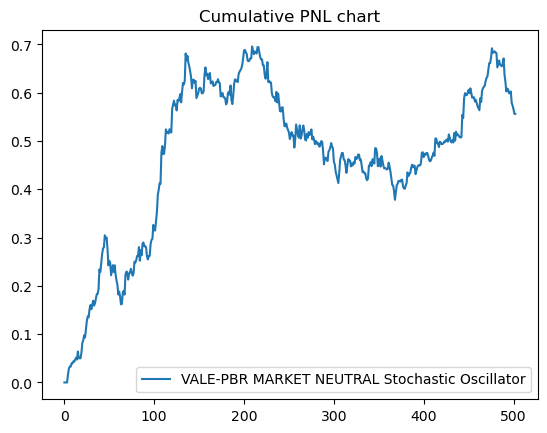


PERFORMANCE STATISTICS FOR VALE-PBR MARKET NEUTRAL MACD Crossover
Daily annualized sharpe: -0.47104078334123983
Average annual returns: -0.19910301829270627%
Total returns: -19.870797262149058%
Max drawdown: -32.97590413594203%


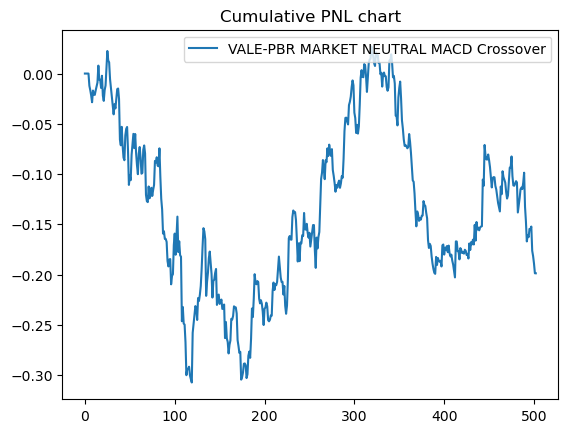

Running pairs trading for ITUB and BBD from Bovespa exchange...


[*********************100%%**********************]  2 of 2 completed

Cointegration test result for ITUB and BBD: 0.8091963014303052
ITUB and BBD are not cointegrated
Running pairs trading for ABEV and GGB from Bovespa exchange...



[*********************100%%**********************]  2 of 2 completed


Cointegration test result for ABEV and GGB: 0.4113229954183228
ABEV and GGB are not cointegrated
Running pairs trading for BHP and CBA from ASX exchange...


[*********************100%%**********************]  2 of 2 completed
C:\Users\ASUS\AppData\Local\Temp\ipykernel_22100\1915727191.py:66: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  spread = (data[ticker1] - result.params[1] * data[ticker2]) - result.params[0]


Cointegration test result for BHP and CBA: 0.015639067469988572

PERFORMANCE STATISTICS FOR BHP-CBA MARKET NEUTRAL Stochastic Oscillator
Daily annualized sharpe: -0.3428708067711447
Average annual returns: -0.5757803432167935%
Total returns: -56.664097268954286%
Max drawdown: -179.48717653041686%


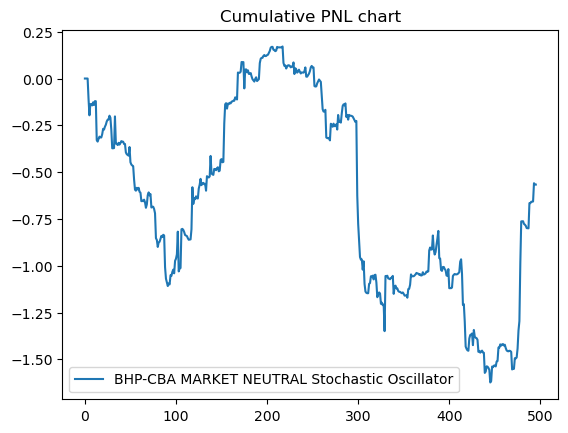


PERFORMANCE STATISTICS FOR BHP-CBA MARKET NEUTRAL MACD Crossover
Daily annualized sharpe: -0.512457731702591
Average annual returns: -0.8643038826811076%
Total returns: -85.05847734322012%
Max drawdown: -142.88157678170253%


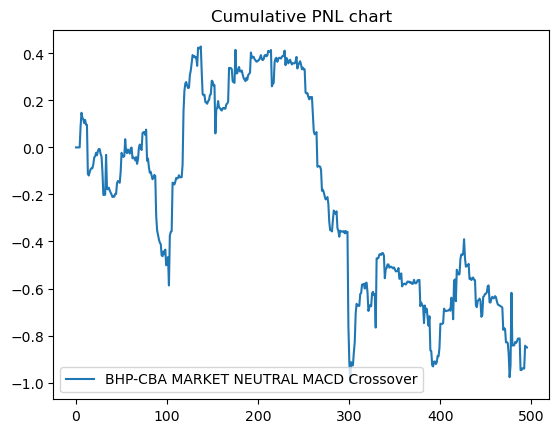

[                       0%%                      ]

Running pairs trading for NAB and WBC from ASX exchange...


[*********************100%%**********************]  2 of 2 completed

2 Failed downloads:
['NAB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-06-01 -> 2024-06-01)')
['WBC']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  2 of 2 completed

1 Failed download:
['ANZ']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-06-01 -> 2024-06-01)')


Not enough data for NAB and WBC
Running pairs trading for ANZ and WES from ASX exchange...
Not enough data for ANZ and WES
Running pairs trading for D05.SI and U11.SI from SGX exchange...


[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Cointegration test result for D05.SI and U11.SI: 0.722200144699823
D05.SI and U11.SI are not cointegrated
Running pairs trading for O39.SI and C52.SI from SGX exchange...
Cointegration test result for O39.SI and C52.SI: 0.9148749189429802
O39.SI and C52.SI are not cointegrated
Running pairs trading for J36.SI and Z74.SI from SGX exchange...


[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
C:\Users\ASUS\AppData\Local\Temp\ipykernel_22100\1915727191.py:66: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  spread = (data[ticker1] - result.params[1] * data[ticker2]) - result.params[0]


Cointegration test result for J36.SI and Z74.SI: 0.18653050490521728
J36.SI and Z74.SI are not cointegrated
Running pairs trading for GC=F and SI=F from Commodities exchange...
Cointegration test result for GC=F and SI=F: 0.2338392823247767
GC=F and SI=F are not cointegrated
Running pairs trading for CL=F and NG=F from Commodities exchange...
Cointegration test result for CL=F and NG=F: 0.0064231150041713266

PERFORMANCE STATISTICS FOR CL=F-NG=F MARKET NEUTRAL Stochastic Oscillator
Daily annualized sharpe: 0.4184339867398177
Average annual returns: 0.3446554330977499%
Total returns: 34.465543309774986%
Max drawdown: -65.50665955065949%


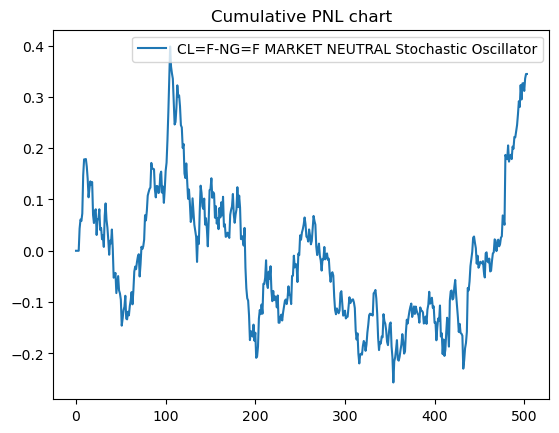


PERFORMANCE STATISTICS FOR CL=F-NG=F MARKET NEUTRAL MACD Crossover
Daily annualized sharpe: -0.785195260802917
Average annual returns: -0.6456721432007019%
Total returns: -64.56721432007019%
Max drawdown: -89.37176194122283%


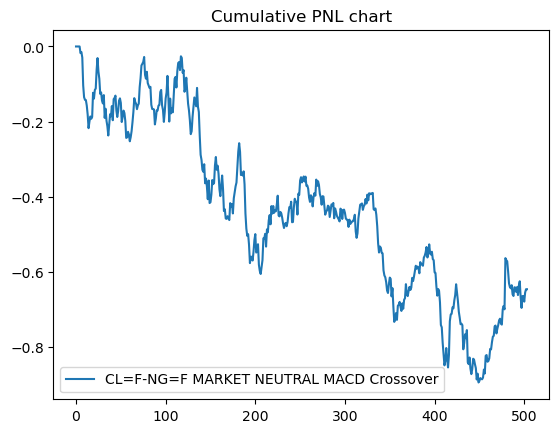

[*********************100%%**********************]  2 of 2 completed

Running pairs trading for HG=F and PA=F from Commodities exchange...
Cointegration test result for HG=F and PA=F: 0.15886192964380957
HG=F and PA=F are not cointegrated
Running pairs trading for BTC-USD and ETH-USD from Cryptos exchange...



[*********************100%%**********************]  2 of 2 completed

Cointegration test result for BTC-USD and ETH-USD: 0.01436125867084807

PERFORMANCE STATISTICS FOR BTC-USD-ETH-USD MARKET NEUTRAL Stochastic Oscillator
Daily annualized sharpe: 0.3567746109171662
Average annual returns: 0.1026134222052249%
Total returns: 14.883018180956231%
Max drawdown: -15.350598527122989%



C:\Users\ASUS\AppData\Local\Temp\ipykernel_22100\1915727191.py:66: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  spread = (data[ticker1] - result.params[1] * data[ticker2]) - result.params[0]


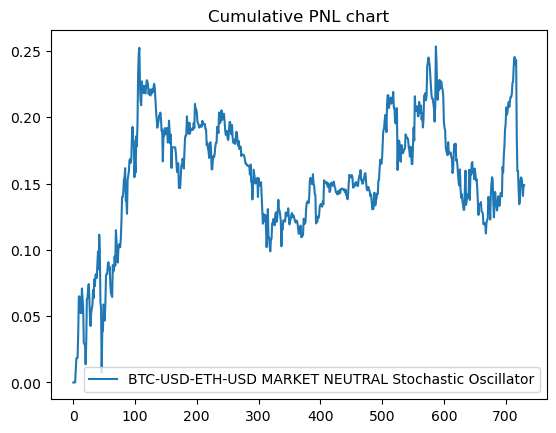


PERFORMANCE STATISTICS FOR BTC-USD-ETH-USD MARKET NEUTRAL MACD Crossover
Daily annualized sharpe: -0.2493270180964352
Average annual returns: -0.07439049890603049%
Total returns: -10.789574345299263%
Max drawdown: -36.4786459405126%


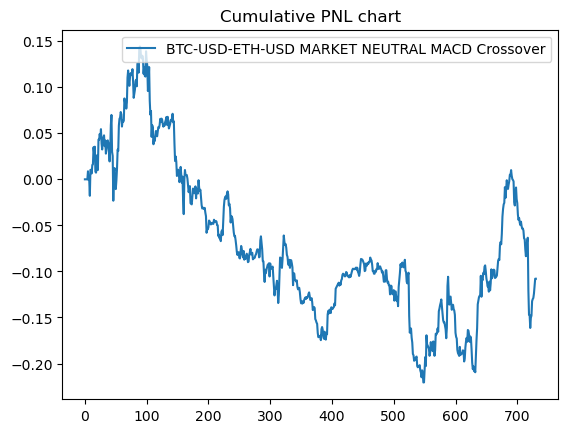

[                       0%%                      ]

Running pairs trading for BNB-USD and USDT-USD from Cryptos exchange...


[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed

Cointegration test result for BNB-USD and USDT-USD: 0.9899615177647799
BNB-USD and USDT-USD are not cointegrated
Running pairs trading for ADA-USD and SOL-USD from Cryptos exchange...
Cointegration test result for ADA-USD and SOL-USD: 0.3275183018525243
ADA-USD and SOL-USD are not cointegrated
Running pairs trading for SPY and QQQ from ETFs exchange...



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
C:\Users\ASUS\AppData\Local\Temp\ipykernel_22100\1915727191.py:66: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  spread = (data[ticker1] - result.params[1] * data[ticker2]) - result.params[0]


Cointegration test result for SPY and QQQ: 0.6436536431109403
SPY and QQQ are not cointegrated
Running pairs trading for IVV and VTI from ETFs exchange...
Cointegration test result for IVV and VTI: 0.03271283468186285

PERFORMANCE STATISTICS FOR IVV-VTI MARKET NEUTRAL Stochastic Oscillator
Daily annualized sharpe: -0.1402324008151197
Average annual returns: -0.002696692504669111%
Total returns: -0.26913419243027037%
Max drawdown: -1.2635825172581938%


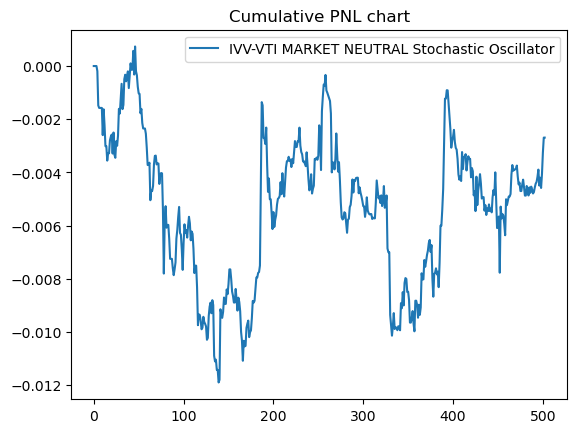


PERFORMANCE STATISTICS FOR IVV-VTI MARKET NEUTRAL MACD Crossover
Daily annualized sharpe: -0.32373239930200165
Average annual returns: -0.006481396464827906%
Total returns: -0.6468536551207216%
Max drawdown: -1.6516151316346817%


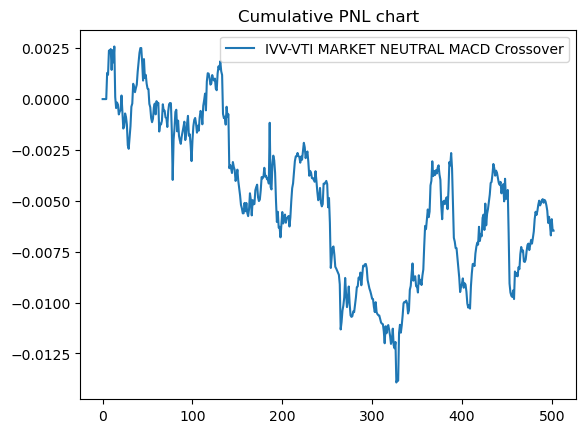

[*********************100%%**********************]  2 of 2 completed

Running pairs trading for VOO and DIA from ETFs exchange...
Cointegration test result for VOO and DIA: 0.7609932225123937
VOO and DIA are not cointegrated


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts

# Define the pairs (ensure these pairs are generally known to be highly correlated and cointegrated)
pairs = {
    'NASDAQ': ['AAPL', 'GOOGL', 'AMZN', 'TSLA', 'MSFT', 'NFLX'],
    'LSE': ['BP', 'SHEL', 'TOT', 'ENI', 'RDSA', 'EQNR'],
    'HKEX': ['BABA', 'TCEHY', 'JD', 'PDD', 'NTES', 'BIDU'],
    'BSE': ['RELIANCE.BO', 'TCS.BO', 'INFY.BO', 'HDFCBANK.BO', 'ICICIBANK.BO', 'SBIN.BO'],
    'TSE': ['SONY', 'TOYOF', 'SNE', 'NTDOY', 'TM', 'NMR'],
    'FWB': ['SIEGY', 'SAP', 'DDAIF', 'VOW3', 'BAS', 'ALV'],
    'Euronext': ['AIR.PA', 'OR.PA', 'MC.PA', 'BN.PA', 'CAP.PA', 'DG.PA'],
    'SIX': ['NVS', 'ROG', 'UBSG', 'CSGN', 'ZURN', 'SCMN'],
    'Bovespa': ['VALE', 'PBR', 'ITUB', 'BBD', 'ABEV', 'GGB'],
    'ASX': ['BHP', 'CBA', 'NAB', 'WBC', 'ANZ', 'WES'],
    'SGX': ['D05.SI', 'U11.SI', 'O39.SI', 'C52.SI', 'J36.SI', 'Z74.SI'],  # DBS, UOB, OCBC, Sembcorp, Jardine Matheson, Singtel
    'Commodities': ['GC=F', 'SI=F', 'CL=F', 'NG=F', 'HG=F', 'PA=F'],  # Gold, Silver, Crude Oil, Natural Gas, Copper, Palladium
    'Cryptos': ['BTC-USD', 'ETH-USD', 'BNB-USD', 'USDT-USD', 'ADA-USD', 'SOL-USD'],
    'ETFs': ['SPY', 'QQQ', 'IVV', 'VTI', 'VOO', 'DIA']
}

# Fetch the data using yfinance
def fetch_data(tickers, start="2022-06-01", end="2024-06-01"):
    data = yf.download(tickers, start=start, end=end)
    return data['Close']

# Utility method to compute PnL diagnostics
def pnl_performance(pnl, label):
    cumpnl = pnl.cumsum(skipna=True)
    sharpe = pnl.mean() / np.std(pnl)
    sharpe = sharpe * np.sqrt(252)
    print("\nPERFORMANCE STATISTICS FOR " + label)
    print("Daily annualized sharpe: " + str(sharpe))
    print("Average annual returns: " + str(pnl.mean() * 252 * 2) + "%")
    print("Total returns: " + str(pnl.sum() * 100) + "%")
    highwatermark_df = cumpnl.cummax()
    drawdown_df = cumpnl - highwatermark_df
    maxdrawdown = drawdown_df.min()
    print("Max drawdown: " + str(maxdrawdown * 100) + "%")
    plt.plot(cumpnl.values, label=label)
    plt.legend()
    plt.title("Cumulative PNL chart")
    plt.show()

# Function to run pairs trading for a given pair
def pairs_trading(data, ticker1, ticker2):
    # Drop rows with missing values
    data = data[[ticker1, ticker2]].dropna()
    
    if data.empty or len(data) < 200:
        print(f"Not enough data for {ticker1} and {ticker2}")
        return

    # Calculate the cointegration test
    coint_result = ts.coint(data[ticker1], data[ticker2])[1]
    print(f"Cointegration test result for {ticker1} and {ticker2}: {coint_result}")

    # Ensure they are cointegrated
    if coint_result < 0.1:
        # Linear regression for spread
        result = sm.OLS(data[ticker1], sm.add_constant(data[ticker2])).fit()
        spread = (data[ticker1] - result.params[1] * data[ticker2]) - result.params[0]

        # Stochastic Oscillator (Mean Reversion)
        period = 20
        maxindividualweight = 0.01
        
        return_df = (data / data.shift(1)) - 1
        signal_df = -(return_df - return_df.rolling(period, min_periods=3).min()) / (return_df.rolling(period, min_periods=3).max() - return_df.rolling(period, min_periods=3).min())
        signal_df = signal_df.subtract(signal_df.mean(axis=1), axis='index')
        signal_df = signal_df.divide(signal_df.abs().sum(axis=1), axis='index')
        signal_df = signal_df.shift(1)
        for i in range(3):
            signal_df[signal_df > maxindividualweight] = maxindividualweight
            signal_df[signal_df < -maxindividualweight] = -maxindividualweight
            signal_df = signal_df.subtract(signal_df.mean(axis=1), axis='index')
            signal_df = signal_df.divide(signal_df.abs().sum(axis=1), axis='index')
        pnl_df = signal_df * return_df.shift(-1)
        pnl = pnl_df.sum(axis=1)
        pnl_performance(pnl, f"{ticker1}-{ticker2} MARKET NEUTRAL Stochastic Oscillator")

        # MA Crossover (Momentum)
        signal_df = -(return_df.rolling(3).mean() - return_df.rolling(period, min_periods=3).mean())
        signal_df = signal_df.subtract(signal_df.mean(axis=1), axis='index')
        signal_df = signal_df.divide(signal_df.abs().sum(axis=1), axis='index')
        signal_df = signal_df.shift(1)
        for i in range(3):
            signal_df[signal_df > maxindividualweight] = maxindividualweight
            signal_df[signal_df < -maxindividualweight] = -maxindividualweight
            signal_df = signal_df.subtract(signal_df.mean(axis=1), axis='index')
            signal_df = signal_df.divide(signal_df.abs().sum(axis=1), axis='index')
        pnl_df = signal_df * return_df.shift(-1)
        pnl = pnl_df.sum(axis=1)
        pnl_performance(pnl, f"{ticker1}-{ticker2} MARKET NEUTRAL MACD Crossover")
    else:
        print(f"{ticker1} and {ticker2} are not cointegrated")

# Fetch and process data for each pair
for exchange, tickers in pairs.items():
    for i in range(0, len(tickers), 2):
        if i+1 < len(tickers):
            ticker1 = tickers[i]
            ticker2 = tickers[i+1]
            print(f"Running pairs trading for {ticker1} and {ticker2} from {exchange} exchange...")
            data = fetch_data([ticker1, ticker2])
            pairs_trading(data, ticker1, ticker2)